# 工厂方法模式
##  意图
工厂方法模式是一种创建型设计模式， 其在父类中提供一个创建对象的方法， 允许子类决定实例化对象的类型。

##  工厂方法模式结构

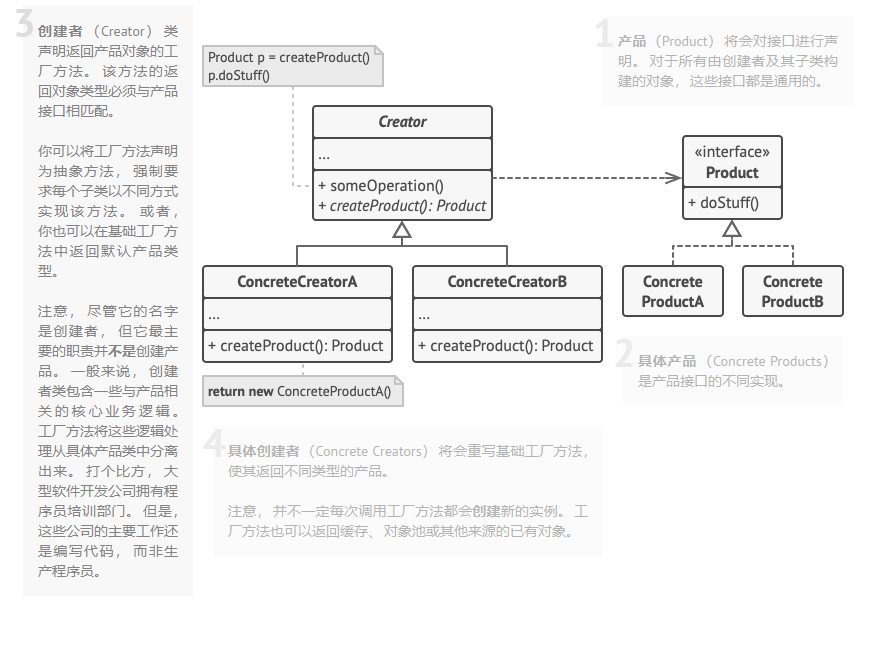

##  工厂方法模式适合应用场景
1. 当你在编写代码的过程中， 如果无法预知对象确切类别及其依赖关系时， 可使用工厂方法。
2. 如果你希望用户能扩展你软件库或框架的内部组件， 可使用工厂方法。
3. 如果你希望复用现有对象来节省系统资源， 而不是每次都重新创建对象， 可使用工厂方法。
## 工厂方法模式优缺点

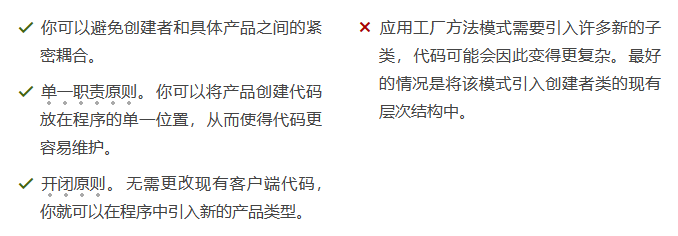

In [3]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Creator(ABC):
    """
    The Creator class declares the factory method that is supposed to return an
    object of a Product class. The Creator's subclasses usually provide the
    implementation of this method.
    """

    @abstractmethod
    def factory_method(self) -> Product:
        """
        Note that the Creator may also provide some default implementation of
        the factory method.
        """
        pass

    def some_operation(self) -> str:
        """
        Also note that, despite its name, the Creator's primary responsibility
        is not creating products. Usually, it contains some core business logic
        that relies on Product objects, returned by the factory method.
        Subclasses can indirectly change that business logic by overriding the
        factory method and returning a different type of product from it.
        """

        # Call the factory method to create a Product object.
        product = self.factory_method()

        return f"Creator: The same creator's code has just worked with {product.operation()}"


"""
Concrete Creators override the factory method in order to change the resulting
product's type.
"""


class ConcreteCreator1(Creator):
    """
    Note that the signature of the method still uses the abstract product type,
    even though the concrete product is actually returned from the method. This
    way the Creator can stay independent of concrete product classes.
    """

    def factory_method(self) -> Product:
        return ConcreteProduct1()


class ConcreteCreator2(Creator):
    def factory_method(self) -> Product:
        return ConcreteProduct2()


class Product(ABC):
    """
    The Product interface declares the operations that all concrete products
    must implement.
    """

    @abstractmethod
    def operation(self) -> str:
        pass


"""
Concrete Products provide various implementations of the Product interface.
"""


class ConcreteProduct1(Product):
    def operation(self) -> str:
        return "{Result of the ConcreteProduct1}"


class ConcreteProduct2(Product):
    def operation(self) -> str:
        return "{Result of the ConcreteProduct2}"


def client_code(creator: Creator) -> None:
    """
    The client code works with an instance of a concrete creator, albeit through
    its base interface. As long as the client keeps working with the creator via
    the base interface, you can pass it any creator's subclass.
    """

    print(
        f"Client: I'm not aware of the creator's class, but it still works.\n"
        f"{creator.some_operation()}",
        end="",
    )


if __name__ == "__main__":
    print("App: Launched with the ConcreteCreator1.")
    client_code(ConcreteCreator1())
    print("\n")

    print("App: Launched with the ConcreteCreator2.")
    client_code(ConcreteCreator2())

App: Launched with the ConcreteCreator1.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct1}

App: Launched with the ConcreteCreator2.
Client: I'm not aware of the creator's class, but it still works.
Creator: The same creator's code has just worked with {Result of the ConcreteProduct2}